In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv(r'C:\Users\VISHAL\4. covid_19_data.csv')
data

In [ ]:
data.info()

# Cleaning


In [ ]:
data.isnull().sum()

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.heatmap(data.isnull())
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.reset_index(inplace = True, drop = True)

In [ ]:
data

# number of confirmed, deaths and recovered cases in each region

In [18]:
data.groupby('Region').sum()

,Confirmed,Deaths,Recovered
Region,,,
Australia,6752,91,5715
Canada,52865,3155,20327
Denmark,198,0,192
France,1450,34,890
Hong Kong,1037,4,830
Macau,45,0,34
Mainland China,82862,4633,77610
Netherlands,196,16,119
UK,1220,69,857


# number of cases where confirmed is less than 10

In [19]:
data.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Alabama,US,6912,256,0
1,4/29/2020,Alaska,US,355,9,0


In [20]:
data[data.Confirmed < 10]

,Date,State,Region,Confirmed,Deaths,Recovered
3,4/29/2020,Anguilla,UK,3,0,3
11,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
13,4/29/2020,British Virgin Islands,UK,6,1,3
22,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
91,4/29/2020,Northwest Territories,Canada,5,0,0
103,4/29/2020,Recovered,Canada,0,0,20327
104,4/29/2020,Recovered,US,0,0,120720
107,4/29/2020,Saint Barthelemy,France,6,0,6
108,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
124,4/29/2020,Tibet,Mainland China,1,0,1


# Region in which max number of confirmed cases were recorded

In [21]:
data.groupby('Region').Confirmed.max().sort_values(ascending = False)

Region
US                299691
Mainland China     68128
Canada             26610
Australia           3016
Hong Kong           1037
UK                   537
France               460
Denmark              187
Netherlands          100
Macau                 45
Name: Confirmed, dtype: int64

# region in which min number of death recorded

In [22]:
data.groupby('Region').Deaths.sum().sort_values(ascending = True)

Region
Denmark               0
Macau                 0
Hong Kong             4
Netherlands          16
France               34
UK                   69
Australia            91
Canada             3155
Mainland China     4633
US                60967
Name: Deaths, dtype: int64

# number of death reported from UK till 29 april 2020

In [23]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Alabama,US,6912,256,0
1,4/29/2020,Alaska,US,355,9,0
2,4/29/2020,Alberta,Canada,5165,87,0
3,4/29/2020,Anguilla,UK,3,0,3
4,4/29/2020,Anhui,Mainland China,991,6,985


In [24]:
data[data.Region == 'UK'].Deaths.sum()

69

# Sorting the data w.r.t Recovered cases in descending order

In [25]:
data.sort_values(by = ['Recovered'], ascending = False)

,Date,State,Region,Confirmed,Deaths,Recovered
104,4/29/2020,Recovered,US,0,0,120720
48,4/29/2020,Hubei,Mainland China,68128,4512,63616
103,4/29/2020,Recovered,Canada,0,0,20327
83,4/29/2020,New South Wales,Australia,3016,40,2284
39,4/29/2020,Guangdong,Mainland China,1588,8,1557
...,...,...,...,...,...,...
67,4/29/2020,Maryland,US,20849,1078,0
65,4/29/2020,Manitoba,Canada,275,6,0
64,4/29/2020,Maine,US,1056,52,0
62,4/29/2020,Louisiana,US,27660,1845,0


# Top 10 State where hihgest deaths occured

In [27]:
Deaths=data.groupby('State')['Deaths'].sum().sort_values(ascending=False)
Deaths

State
New York                            23477
New Jersey                           6771
Hubei                                4512
Michigan                             3670
Massachusetts                        3405
                                    ...  
Northern Territory                      0
New Brunswick                           0
New Caledonia                           0
Bonaire, Sint Eustatius and Saba        0
Saint Barthelemy                        0
Name: Deaths, Length: 137, dtype: int64

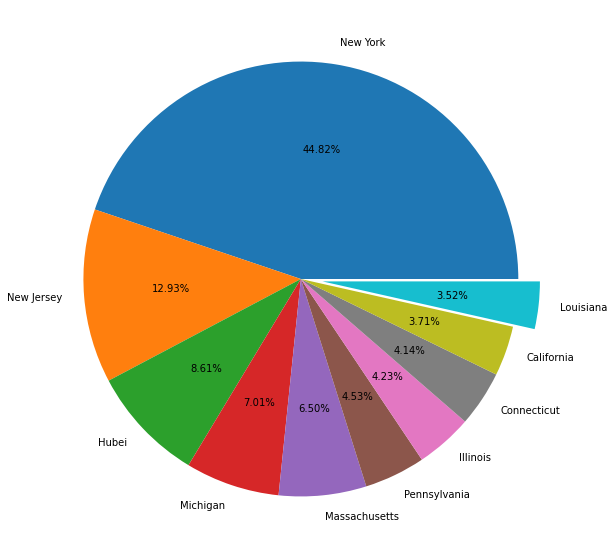

In [30]:
plt.figure(figsize=(10,10))
plt.pie(Deaths[0:10],labels=Deaths[0:10].keys(),autopct='%0.2f%%', explode=[0,0,0,0,0,0,0,0,0,0.1])
plt.show()